In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.integrate import quad
import arviz as az
import warnings

# Ignora i warning di tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "discr_rv_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

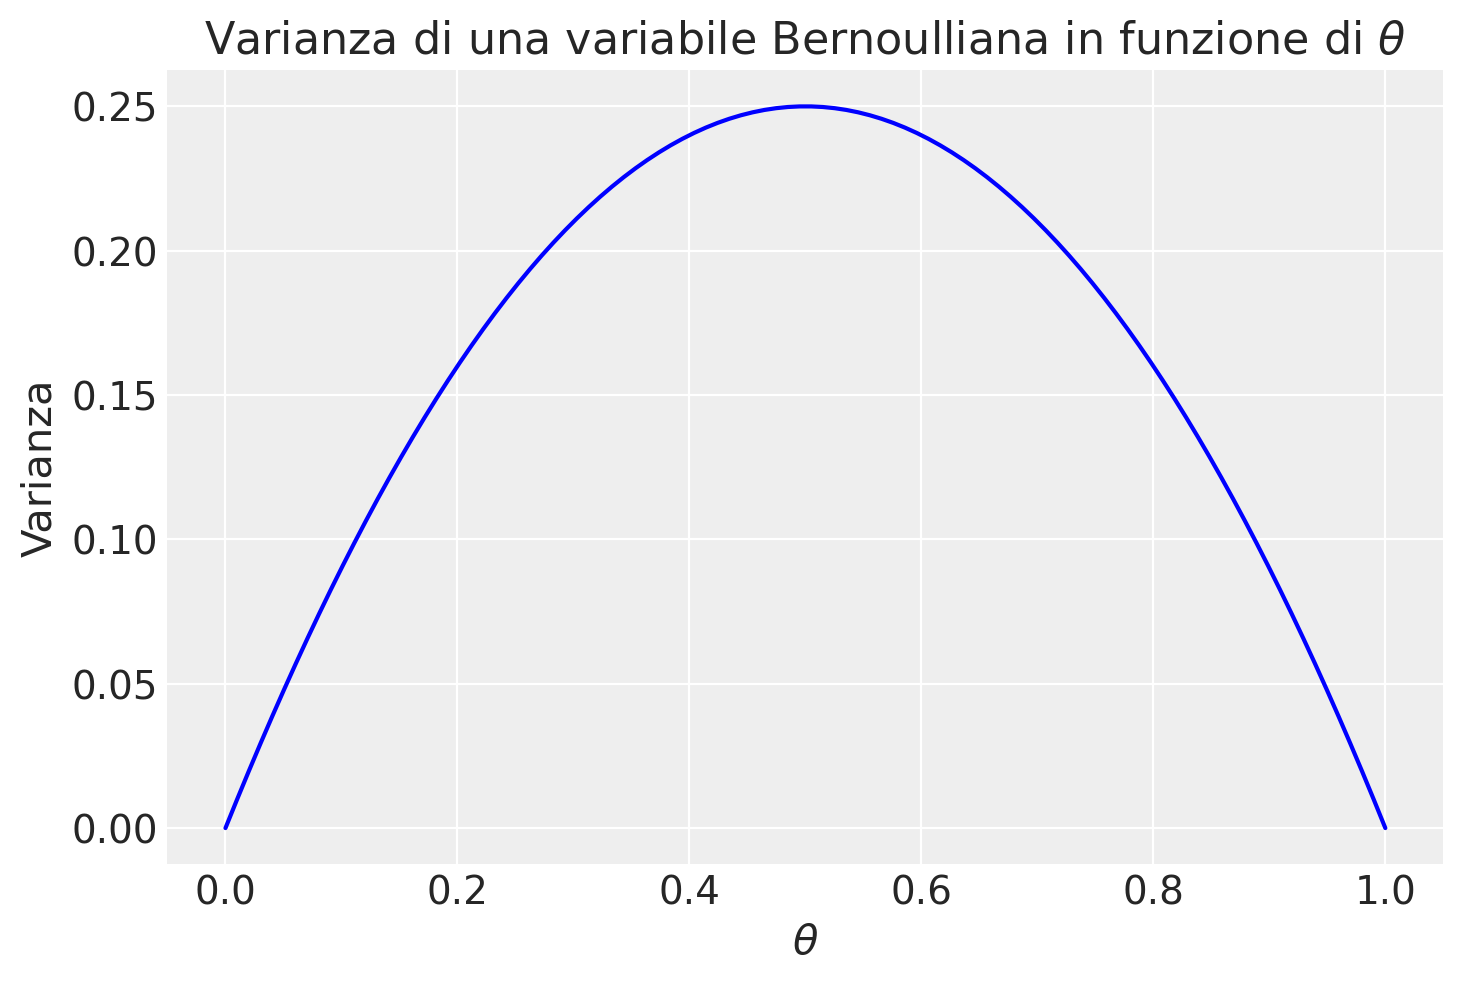

In [3]:
# Define theta values between 0 and 1
theta = np.linspace(0, 1, 100)

# Variance of a Bernoulli distribution is theta(1-theta)
variance = theta * (1 - theta)

plt.plot(theta, variance, label='Varianza', color='blue')
plt.title('Varianza di una variabile Bernoulliana in funzione di $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Varianza')
plt.show()

In [4]:
n = 4
theta = 0.2
y = 2

prob = math.comb(n, y) * theta**y * (1 - theta) ** (n - y)
print(prob)

0.15360000000000007


In [5]:
stats.binom.pmf(y, n, theta)

0.15359999999999993

In [6]:
y = np.arange(0, n + 1)
print(y)

[0 1 2 3 4]


In [7]:
probabilities = stats.binom.pmf(y, n, theta)
print(*probabilities)

0.40959999999999985 0.4096 0.15359999999999993 0.02559999999999999 0.0016000000000000003


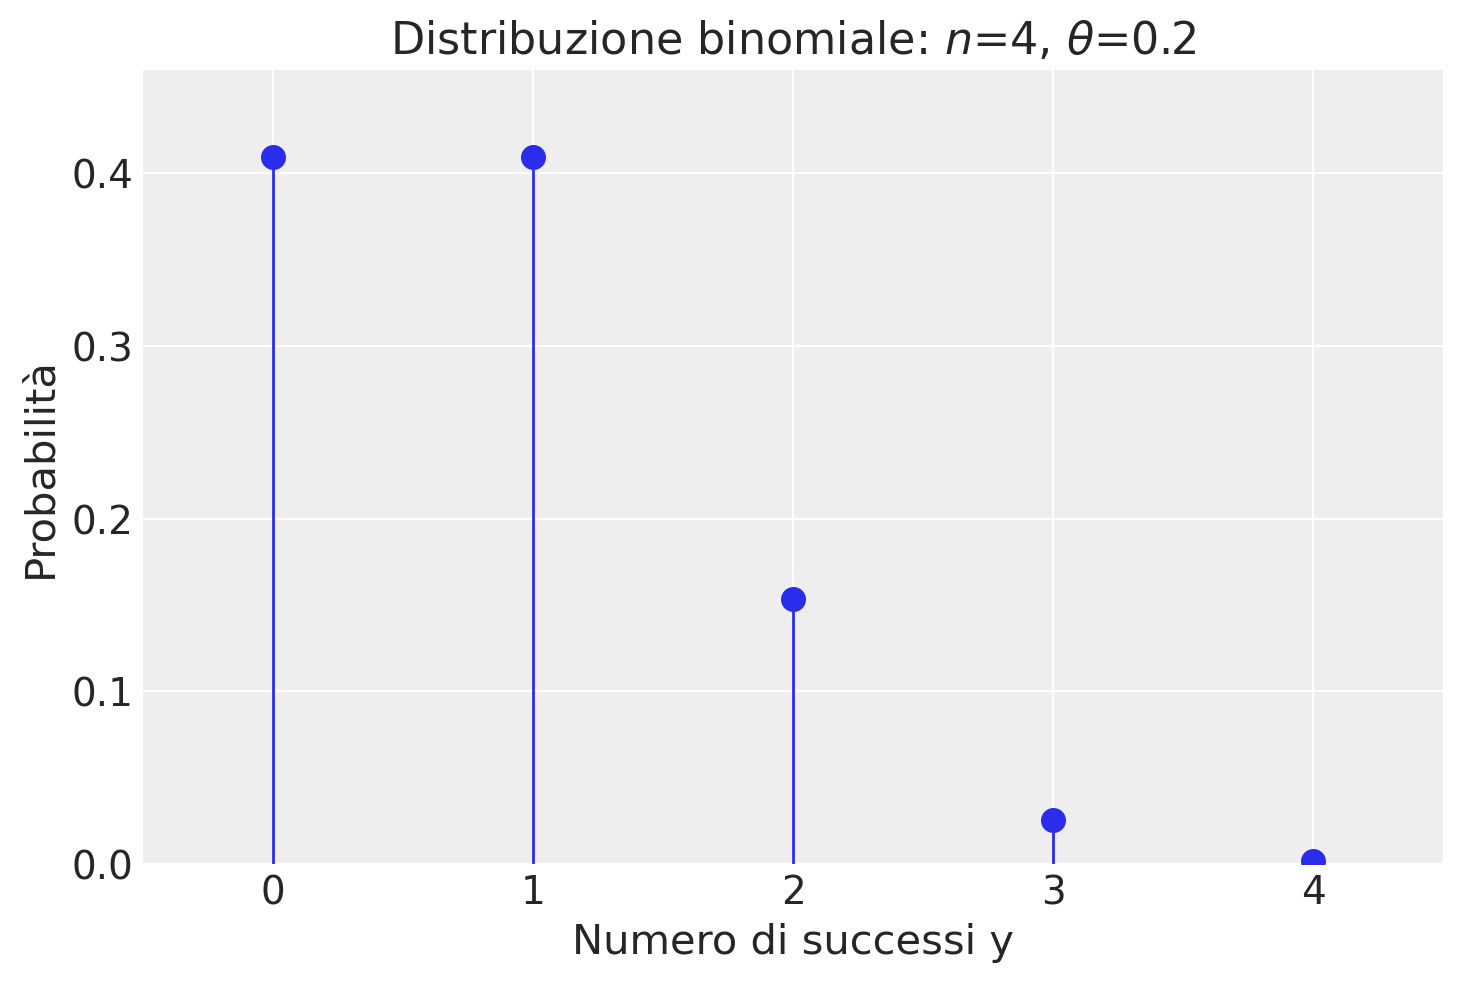

In [8]:
plt.figure()
plt.plot(y, probabilities, "o", ms=8)
plt.vlines(y, 0, probabilities, linestyles="-", lw=1)
plt.title(f"Distribuzione binomiale: $n$={n}, $\\theta$={theta}")
plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.xlim(-0.5, n + 0.5)
plt.ylim(0, max(probabilities) + 0.05)
plt.show()

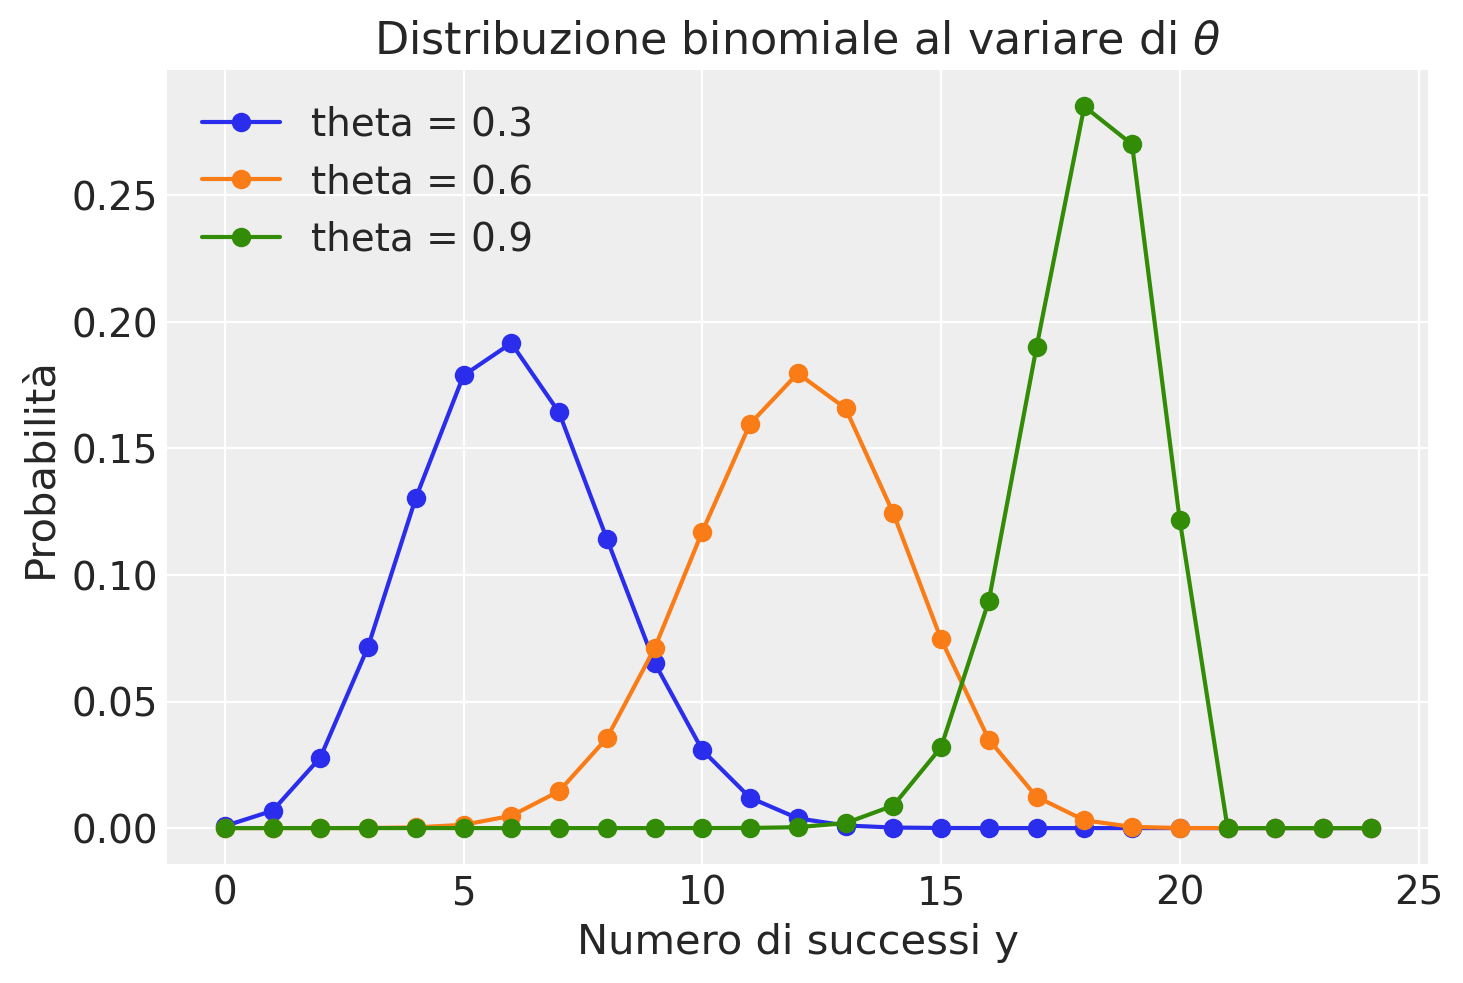

In [9]:
plt.figure()

for theta in np.arange(0.3, 1.0, 0.3):
    y = np.arange(0, 25)
    binom_dist = stats.binom.pmf(y, 20, theta)
    plt.plot(y, binom_dist, "-o", label=f"theta = {theta:.1f}")

plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.title("Distribuzione binomiale al variare di $\\theta$")
plt.legend()
plt.show()

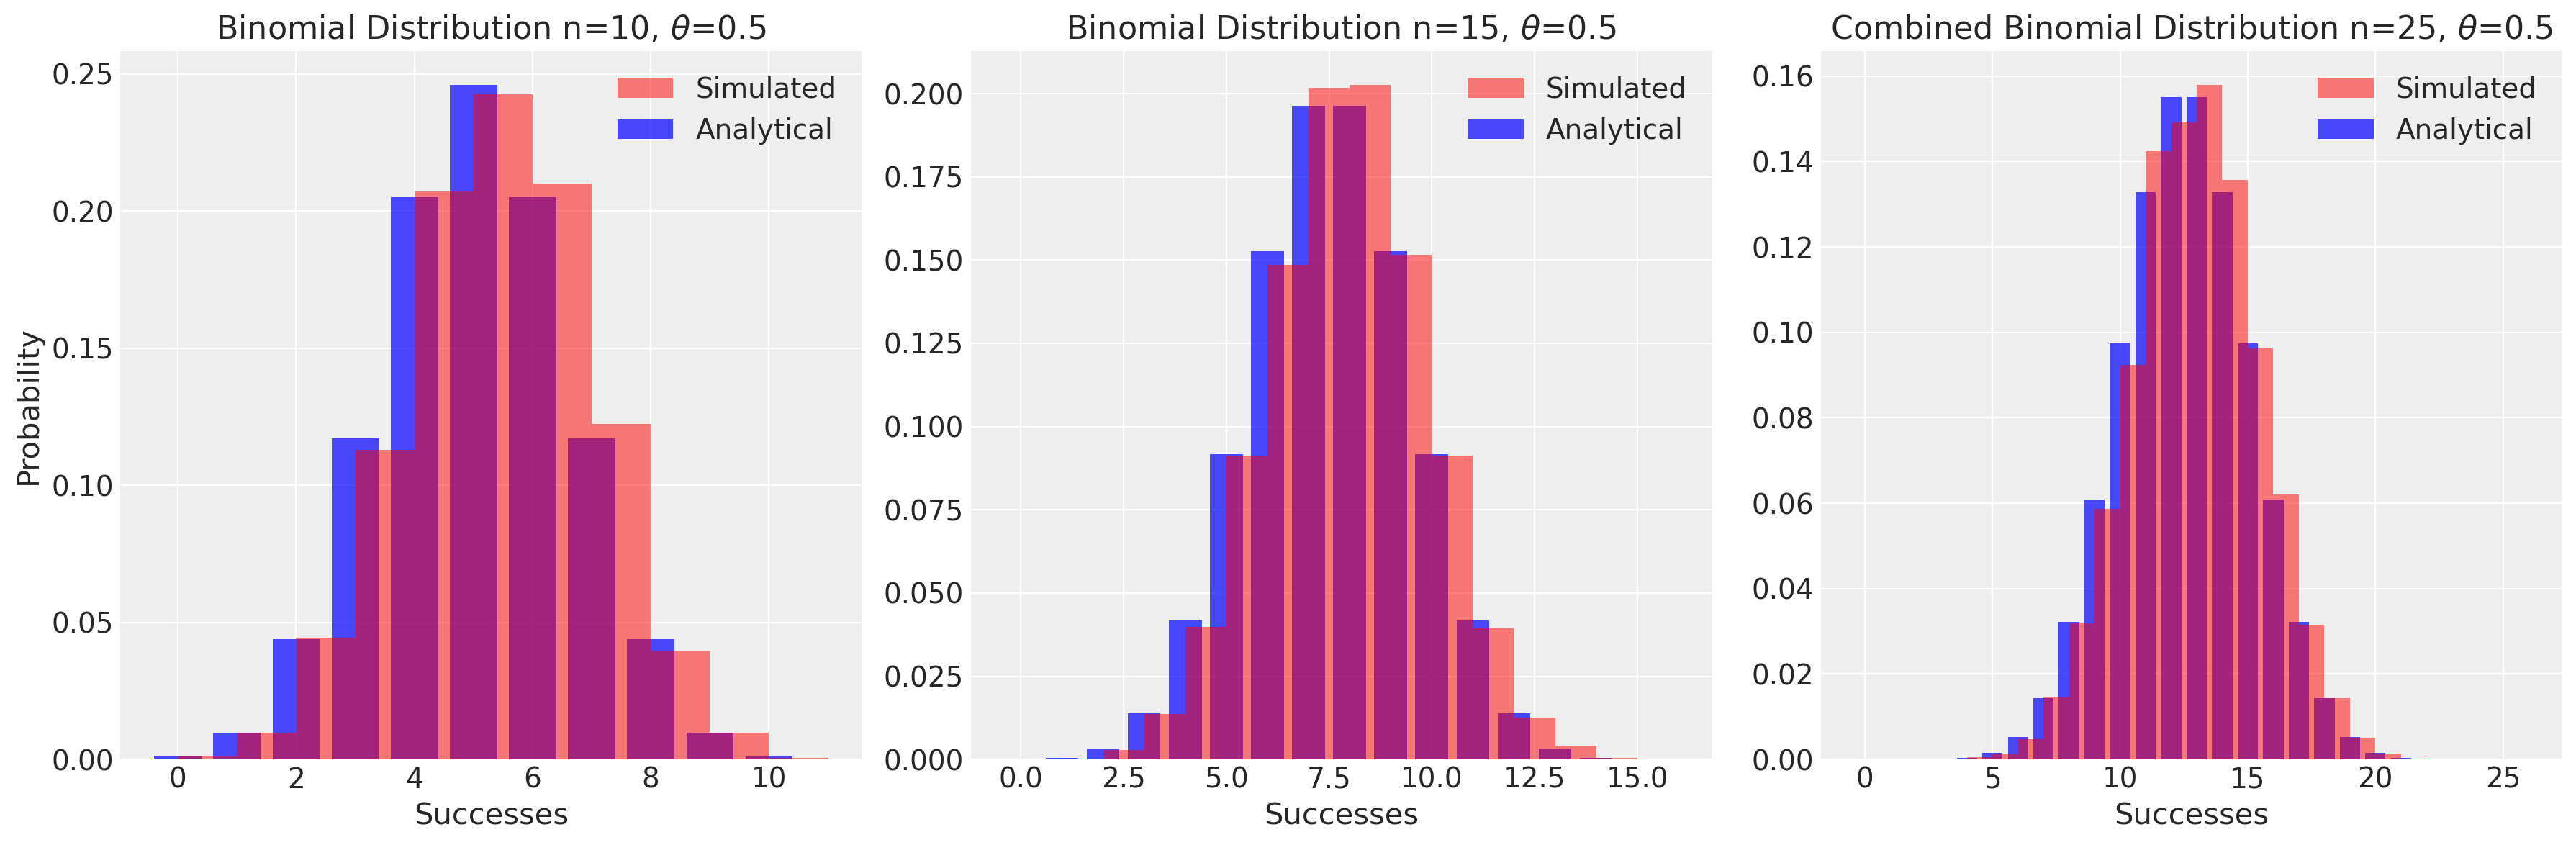

In [10]:
# Parameters
n1, n2 = 10, 15  # Number of trials
theta = 0.5  # Success probability

# Analytical binomial distributions
x1 = np.arange(0, n1+1)
y1 = stats.binom.pmf(x1, n1, theta)
x2 = np.arange(0, n2+1)
y2 = stats.binom.pmf(x2, n2, theta)

# Combined analytical distribution
x_combined = np.arange(0, n1+n2+1)
y_combined = stats.binom.pmf(x_combined, n1+n2, theta)

# Simulated distributions
simulated1 = rng.binomial(n1, theta, 10000)
simulated2 = rng.binomial(n2, theta, 10000)
simulated_combined = simulated1 + simulated2

# Plotting
plt.figure(figsize=(18, 6))

# Plot 1: Binomial 1
plt.subplot(1, 3, 1)
plt.bar(x1, y1, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated1, bins=range(n1+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Binomial Distribution n={n1}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.ylabel('Probability')
plt.legend()

# Plot 2: Binomial 2
plt.subplot(1, 3, 2)
plt.bar(x2, y2, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated2, bins=range(n2+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Binomial Distribution n={n2}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.legend()

# Plot 3: Combined Binomial
plt.subplot(1, 3, 3)
plt.bar(x_combined, y_combined, color='blue', alpha=0.7, label='Analytical')
plt.hist(simulated_combined, bins=range(n1+n2+2), density=True, alpha=0.5, color='red', label='Simulated')
plt.title(f'Combined Binomial Distribution n={n1+n2}, $\\theta$={theta}')
plt.xlabel('Successes')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
stats.binom.pmf(2, n=5, p=0.5) + stats.binom.pmf(3, n=5, p=0.5) + stats.binom.pmf(4, n=5, p=0.5) +  stats.binom.pmf(5, n=5, p=0.5)

0.8125

In [12]:
np.sum([stats.binom.pmf(k, n=5, p=0.5) for k in range(2, 6)])

0.8125

In [13]:
1 - stats.binom.cdf(1, n=5, p=0.5) 

0.8125

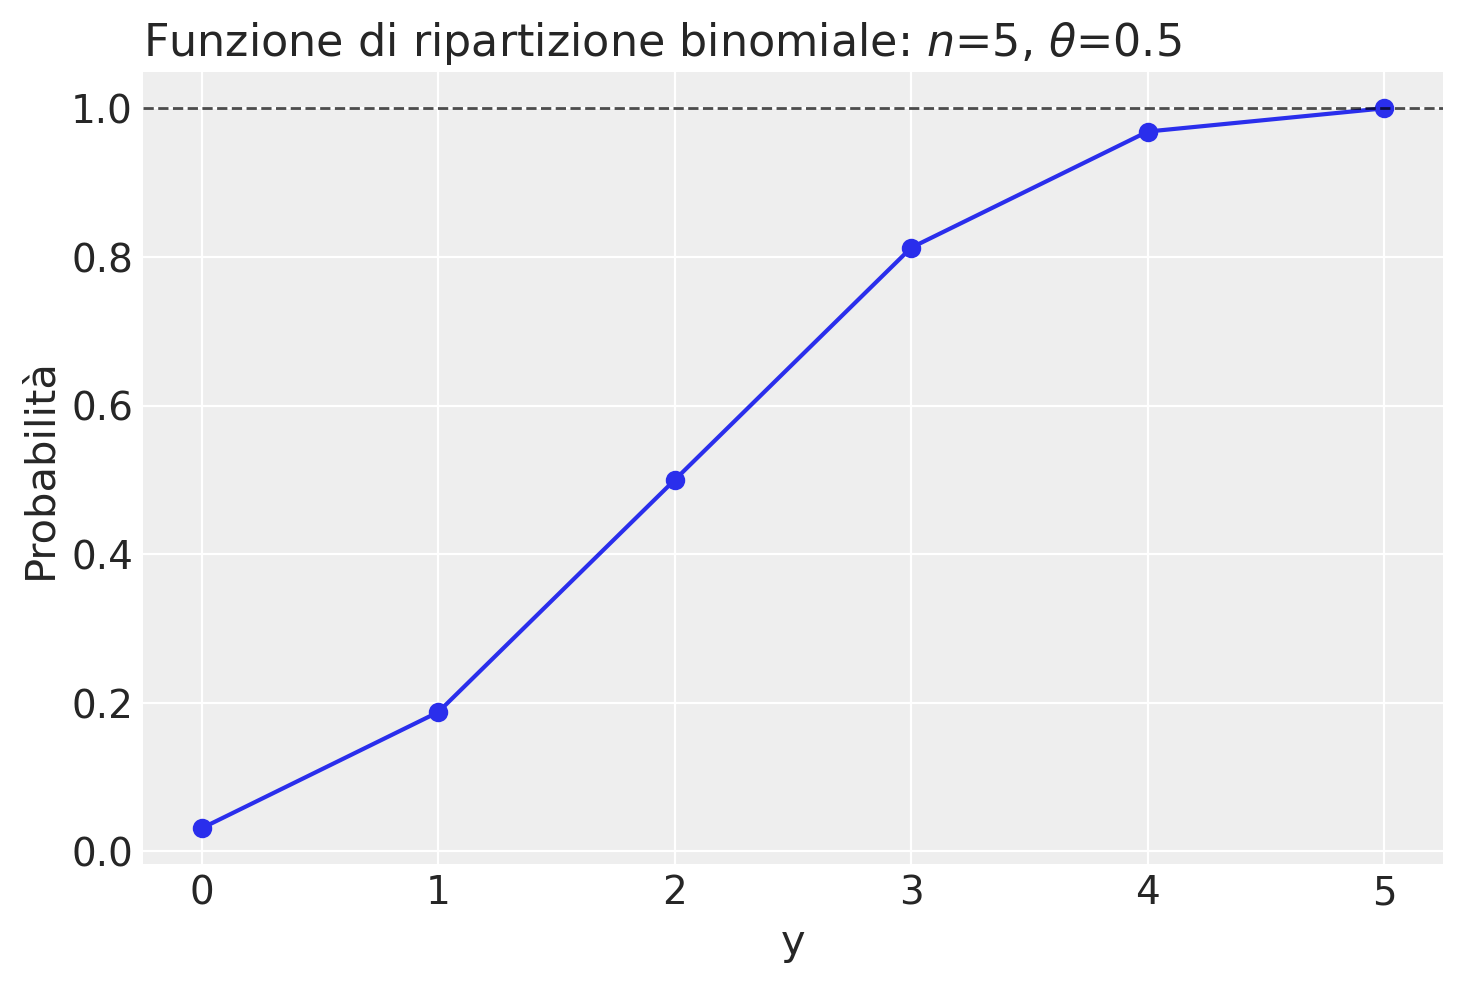

In [14]:
n = 5
theta = 0.5
y = np.arange(0, n+1)

plt.figure()
plt.plot(y, stats.binom.cdf(y, n=n, p=theta))
plt.scatter(y, stats.binom.cdf(y, n=n, p=theta))
plt.axhline(1, color="k", alpha=0.7, linestyle="--", lw=1)
plt.title(f"Funzione di ripartizione binomiale: $n$={n}, $\\theta$={theta}", loc="left")
plt.xlabel("y")
_ = plt.ylabel("Probabilità")

In [15]:
target_probability = 1 - 0.8125
stats.binom.ppf(target_probability, n, theta)

1.0

In [16]:
target_probability = stats.binom.cdf(4, n=10, p=0.2)
target_probability

0.9672065024

In [17]:
stats.binom.ppf(target_probability, n=10, p=0.2)

4.0

In [18]:
rng = np.random.default_rng(42)

In [19]:
x = rng.binomial(p=.5, n=5, size=30)
print(*x)

3 2 4 3 1 5 3 3 1 2 2 4 3 4 2 2 3 1 4 3 3 2 5 4 3 2 2 1 1 3


In [20]:
x = rng.binomial(p=.2, n=4, size=1000000)

In [21]:
np.mean(x)

0.800159

In [22]:
np.var(x, ddof=0)

0.6402445747189999

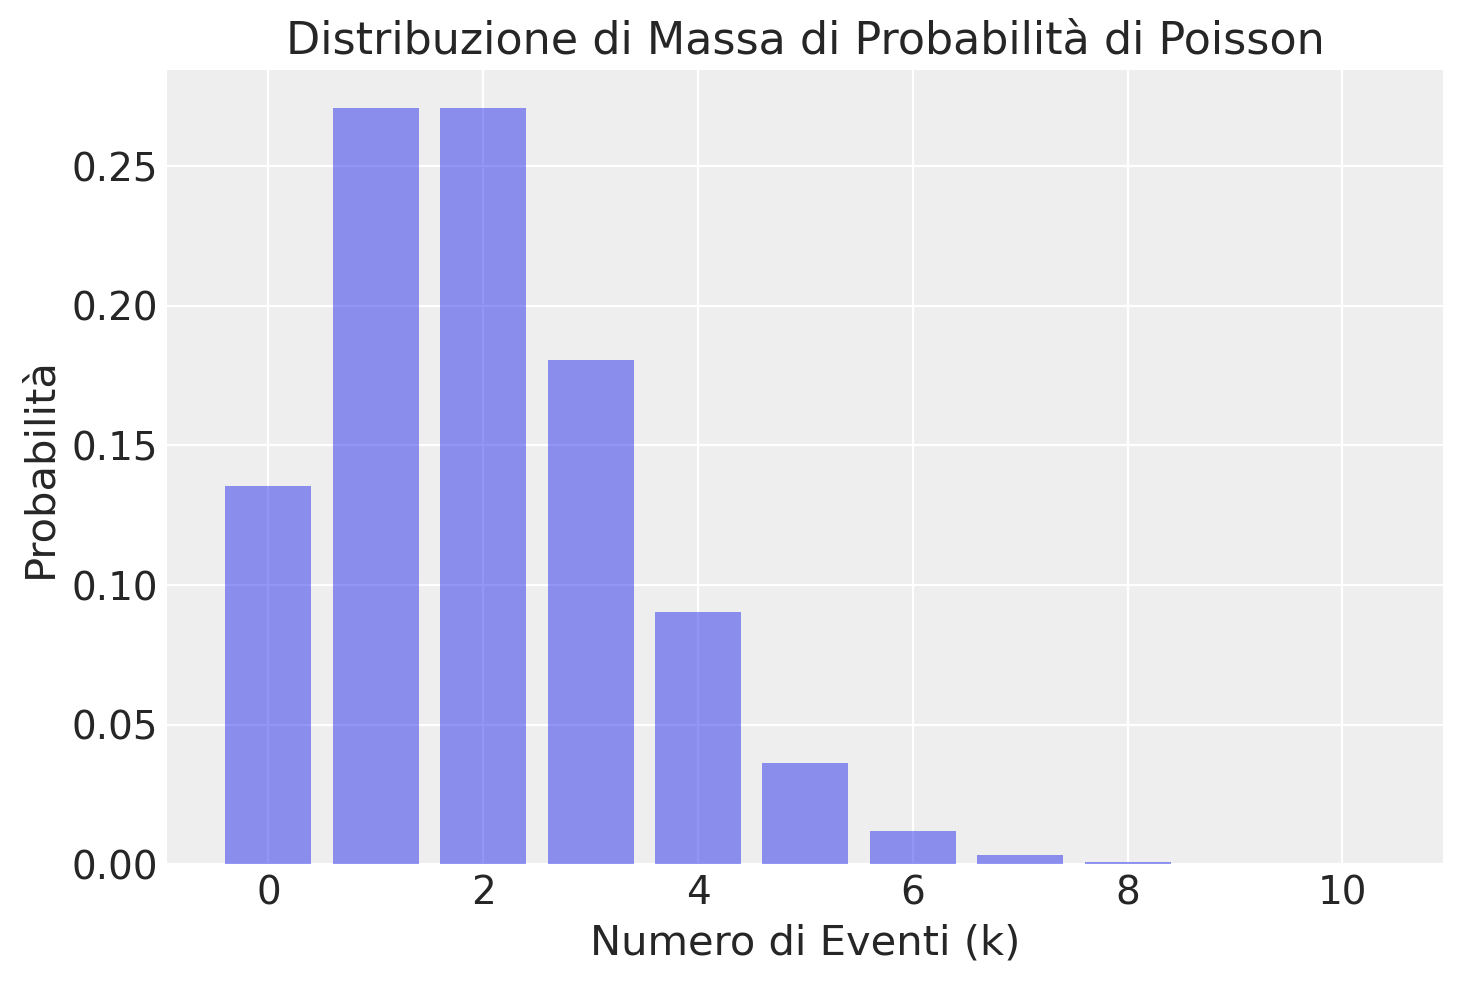

In [23]:
# Tasso medio di occorrenza di eventi
lambda_value = 2

# Creazione della distribuzione di Poisson con il tasso medio specificato
poisson_dist = stats.poisson(mu=lambda_value)

# Calcolo della probabilità di avere un certo numero di eventi
k_values = range(0, 11)  # Consideriamo valori da 0 a 10

# Calcolo delle probabilità corrispondenti
probabilities = poisson_dist.pmf(k_values)

plt.figure()

# Plot della distribuzione di massa di probabilità
plt.bar(k_values, probabilities, alpha=0.5)
plt.xlabel('Numero di Eventi (k)')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Massa di Probabilità di Poisson')
plt.show()

In [24]:
stats.poisson.pmf(k=3, mu=2)

0.18044704431548356

In [25]:
p = stats.poisson.pmf(k=0, mu=2) + stats.poisson.pmf(k=1, mu=2) + stats.poisson.pmf(k=2, mu=2) + stats.poisson.pmf(k=3, mu=2)
p

0.857123460498547

In [26]:
stats.poisson.ppf(p, mu=2)

3.0

In [27]:
stats.poisson.cdf(3, mu=2)

0.857123460498547

In [28]:
mu = 2
x = rng.poisson(mu, 1000000)

In [29]:
np.mean(x)

1.998481

In [30]:
np.var(x, ddof=0)

1.9991306926389998

In [31]:
p = stats.poisson.pmf(k=6, mu=4.5)
print(f"La probabilità che domani in questo ospedale nasceranno 6 bambini è: {p:.4f}")

La probabilità che domani in questo ospedale nasceranno 6 bambini è: 0.1281


In [32]:
# Simuliamo le nascite in un anno (365 giorni) con una media storica di 4.5 nascite al giorno
n_days = 365
mean_births_per_day = 4.5
simulated_births = rng.poisson(mean_births_per_day, n_days)

# Calcoliamo la proporzione di giorni in cui sono nati esattamente 6 bambini nella simulazione
proportion_six_births = np.mean(simulated_births == 6)

# Stampiamo la proporzione calcolata
print(f"La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: {proportion_six_births:.4f}")

La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: 0.1151


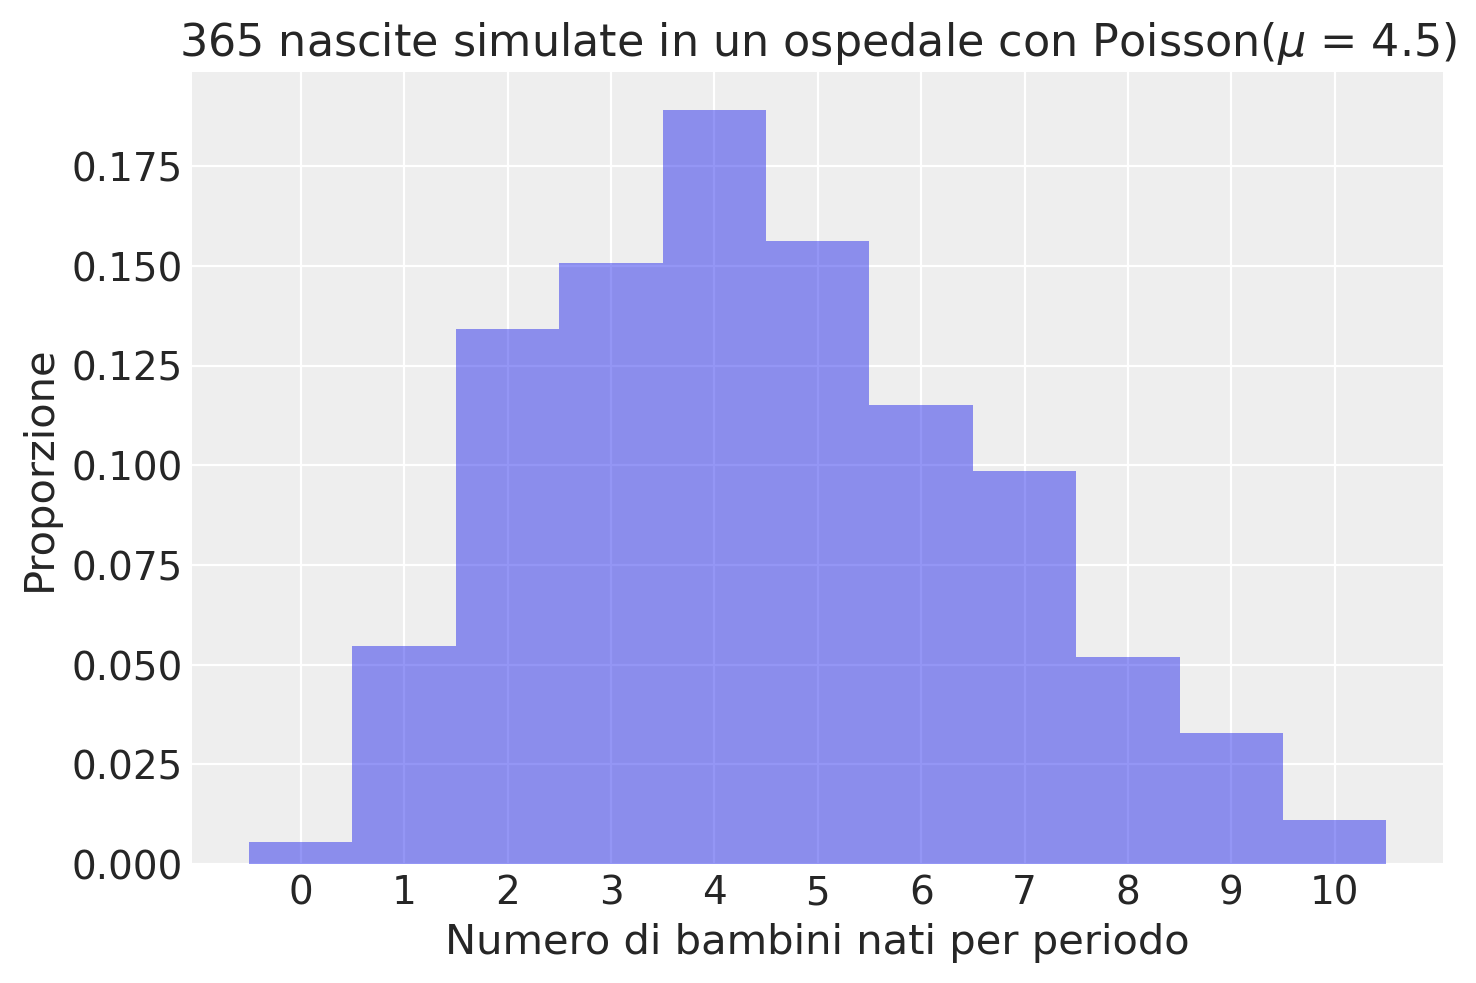

In [33]:
# Visualizziamo l'istogramma delle nascite simulate
plt.hist(simulated_births, bins=np.arange(12) - 0.5, density=True, alpha=0.5)
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
plt.xticks(np.arange(11));

In [34]:
prob_more_than_six = 1 - stats.poisson.cdf(6, mean_births_per_day)
print(f"La probabilità teorica di più di 6 bambini nati è: {prob_more_than_six:.4f}")

La probabilità teorica di più di 6 bambini nati è: 0.1689


In [35]:
proportion_more_than_six = np.mean(simulated_births > 6)
print(f"La proporzione di giorni con più di 6 bambini nati nella simulazione è: {proportion_more_than_six:.4f}")

La proporzione di giorni con più di 6 bambini nati nella simulazione è: 0.1945


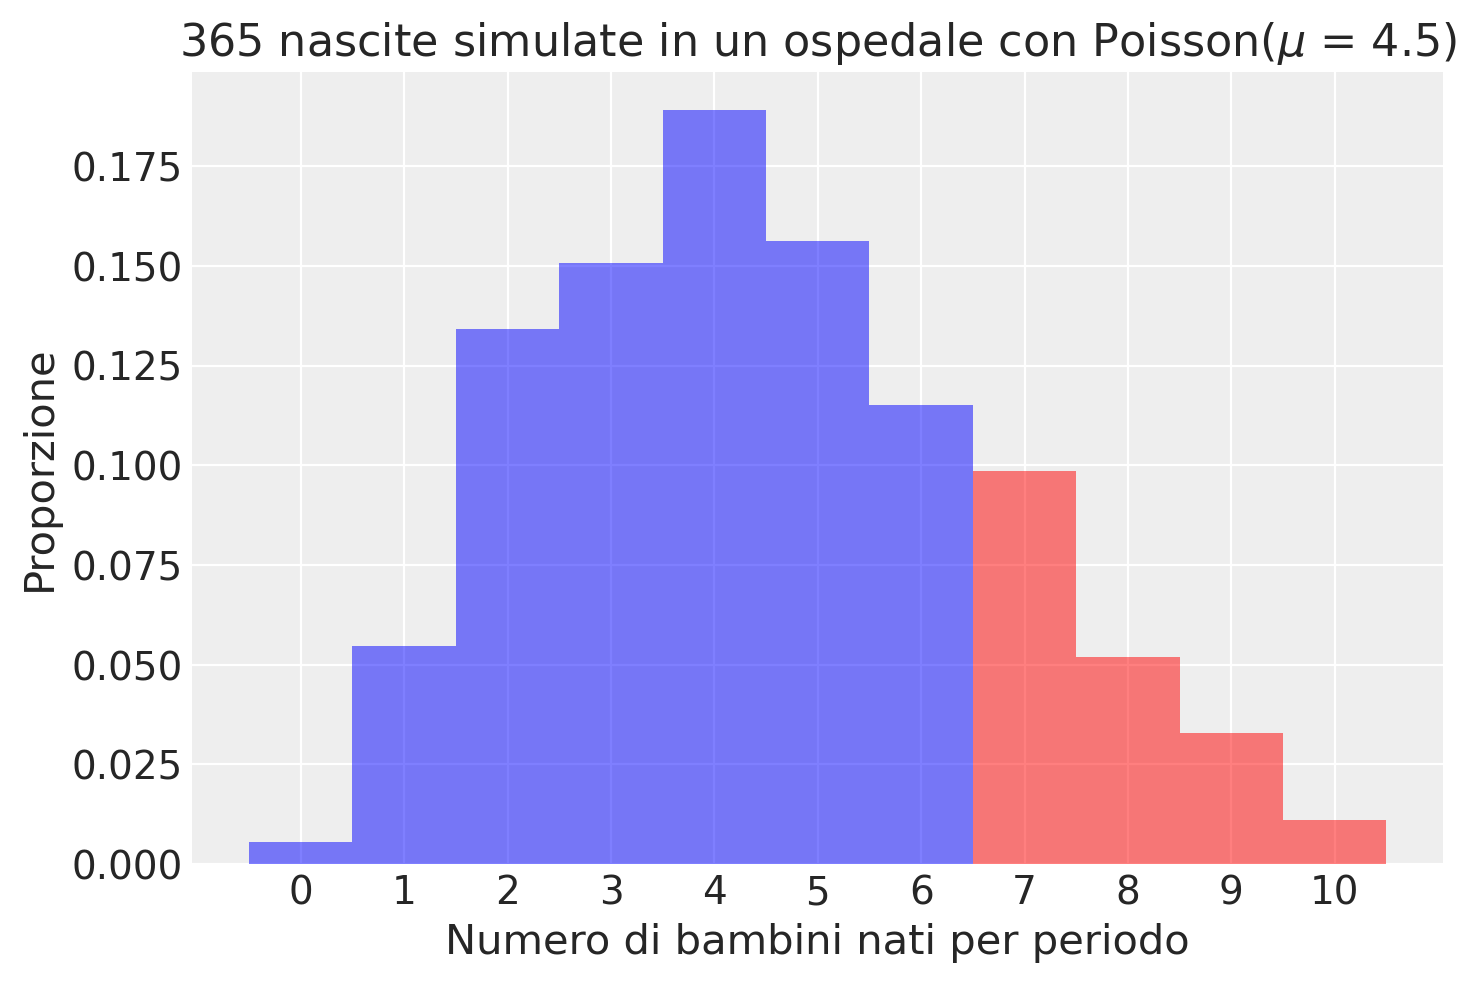

In [36]:
bins = np.arange(12) - 0.5
hist, edges = np.histogram(simulated_births, bins=bins, density=True)

# Disegna l'istogramma
for i in range(len(hist)):
    if edges[i] >= 6:
        color = 'red'  # Colore per x > 6
    else:
        color = 'blue'  # Colore per x <= 6
    plt.bar(edges[i], hist[i], width=1, align='edge', color=color, alpha=0.5)

# Imposta etichette e titolo
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
_ = plt.xticks(np.arange(11))

In [37]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
scipy     : 1.13.1
matplotlib: 3.8.4
seaborn   : 0.13.2
pandas    : 2.2.2
arviz     : 0.18.0

Watermark: 2.4.3

